# Housing Price Prediction 

In [1]:
import pandas as pd 

In [2]:
house_df = pd.read_csv("home_data.csv")

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We do not have any null values, since data is provided by course instructors . We can assume it is already cleaned 

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_df[house_df['zipcode'] == 98039]['price'].mean()

2160606.6

In [20]:
filtered_data = house_df[(house_df['sqft_living'] >= 2000) & (house_df['sqft_living'] <= 4000)] 

In [22]:
proportion = len(filtered_data) / len(house_df)
print(proportion)

0.4266413732475825


## Building Regression Model Based on Sqft 

### Relation between sqft and house price 

In [7]:
import seaborn as sns 

<Axes: xlabel='sqft_living', ylabel='price'>

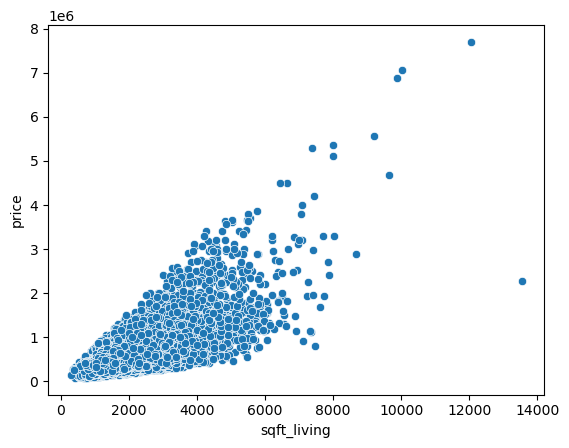

In [23]:
sns.scatterplot(data = house_df, x = 'sqft_living',y='price')

In [25]:
from sklearn.model_selection import train_test_split

In [51]:
X = house_df['sqft_living']
Y = house_df['price']
X_reshaped = X.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
   X_reshaped, Y, test_size=0.2, random_state=0)



In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
regr = linear_model.LinearRegression()

In [54]:
regr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = regr.predict(X_test)

In [56]:
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred,squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [283.96855737]
Root Mean squared error: 248879.06
Coefficient of determination: 0.48


In [57]:
import matplotlib.pyplot as plt 

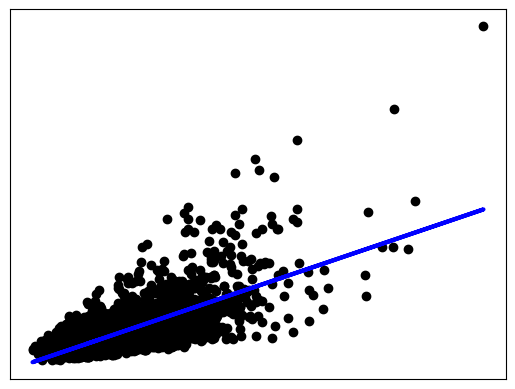

In [58]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Linear Regression Model with advanced features

In [59]:
features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [60]:
X = house_df[features]
Y = house_df['price']
X_train, X_test, y_train, y_test = train_test_split(
   X, Y, test_size=0.2, random_state=0)

In [61]:
regr = linear_model.LinearRegression()

In [62]:
regr.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = regr.predict(X_test)

In [64]:
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred,squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [-3.46742831e+04  3.94310007e+04  1.12610340e+02  1.75888737e-01
  7.42456845e+03 -5.67468805e+02  2.61695183e+04  9.35901502e+04
  6.05600529e+05  5.27368893e+04  7.27875904e+01  3.98227503e+01
 -2.60713698e+03  2.01053038e+01  6.04865961e+05 -2.22392029e+05
  2.42333853e+01 -4.67450072e-01]
Root Mean squared error: 190473.38
Coefficient of determination: 0.69
